In [28]:
# Data science helpers
from pathlib import Path
import pandas as pd 
import numpy as np

import featuretools as ft


In [30]:

import pandas as pd 
import dask.dataframe as dd

# Define the expected data types for columns
dtype = {
    'Unnamed: 0': 'int64',
    'item_nbr': 'int64',
    'store_nbr': 'int64',
    'unit_sales': 'float64'
}

# Read the CSV file into a Dask DataFrame with specified data types
df = dd.read_csv('all_info.csv', dtype=dtype)

# Assuming `dask_df` is your Dask DataFrame
all_info = df.compute()

In [32]:
all_info.head()

,Unnamed: 0,id,unit_sales,dcoilwtico,transactions,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,...,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,ss_scaled_transactions,ss_scaled_dcoilwtico
0,0,0,7.0,NaN,770.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.069077,NaN
1,1,1,1.0,NaN,770.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.069077,NaN
2,2,2,2.0,NaN,770.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.069077,NaN
3,3,3,1.0,NaN,770.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.069077,NaN
4,4,4,1.0,NaN,770.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.069077,NaN


In [ ]:
df_oil = pd.read_csv("oil.csv", parse_dates=['date'])

all_info=all_info.merge(df_oil,left_on='date', right_on='date',
                 how='left' )

In [ ]:
df_transactions = pd.read_csv("transactions.csv", parse_dates=['date'])

all_info=all_info.merge(df_transactions, left_on=['date','store_nbr'], right_on=['date','store_nbr'],                how='left' )


In [ ]:
all_info['date']=pd.to_datetime(all_info['date'],format= "%d/%m/%Y")

## Create features from the date like month, year and weekday

In [ ]:
all_info['month']=all_info['date'].dt.month

In [ ]:
all_info['year']=all_info['date'].dt.year

In [ ]:
all_info['day']=all_info['date'].dt.weekday

In [9]:
all_info.isnull().sum()

Unnamed: 0              0
item_nbr                0
family                  0
class                   0
perishable              0
id                      0
date                    0
store_nbr               0
unit_sales              0
on_sale                 0
city                    0
state                   0
type_item               0
cluster                 0
type_holiday    106135418
locale          106135418
locale_name     106135418
description     106135418
transferred             0
dcoilwtico       41953794
transactions       214616
month                   0
year                    0
day                     0
dtype: int64

## Create dummy variables for each categorical variable

In [10]:
dummy_variables = ['store_nbr','family','cluster','class','type_holiday',
                'family','perishable','on_sale','state','city','year','day','type_item', 'transferred','locale','month','locale_name']

In [11]:
# One-hot encode the categorical variables with Dask
df_encoded = dd.get_dummies(all_info,columns=dummy_variables, sparse=True)

# Step 4: If you want to inspect the first few rows, compute a small sample
df_sample = df_encoded.head(5)  # This will convert only the first 5 rows to Pandas

# Print the sample
print(df_sample)

   Unnamed: 0  item_nbr  id       date  unit_sales         description  \
0           0    103665   0 2013-01-01         7.0  Primer dia del ano   
1           1    105574   1 2013-01-01         1.0  Primer dia del ano   
2           2    105575   2 2013-01-01         2.0  Primer dia del ano   
3           3    108079   3 2013-01-01         1.0  Primer dia del ano   
4           4    108701   4 2013-01-01         1.0  Primer dia del ano   

   dcoilwtico  transactions  store_nbr_1  store_nbr_2  ...  \
0         NaN         770.0        False        False  ...   
1         NaN         770.0        False        False  ...   
2         NaN         770.0        False        False  ...   
3         NaN         770.0        False        False  ...   
4         NaN         770.0        False        False  ...   

   locale_name_Machala  locale_name_Manta  locale_name_Puyo  \
0                False              False             False   
1                False              False             Fa

In [12]:
df_encoded.head()

,Unnamed: 0,item_nbr,id,date,unit_sales,description,dcoilwtico,transactions,store_nbr_1,store_nbr_2,...,locale_name_Machala,locale_name_Manta,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas
0,0,103665,0,2013-01-01,7.0,Primer dia del ano,NaN,770.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,105574,1,2013-01-01,1.0,Primer dia del ano,NaN,770.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,105575,2,2013-01-01,2.0,Primer dia del ano,NaN,770.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,108079,3,2013-01-01,1.0,Primer dia del ano,NaN,770.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,108701,4,2013-01-01,1.0,Primer dia del ano,NaN,770.0,False,False,...,False,False,False,False,False,False,False,False,False,False


## Remove columns that are neither categorical nor numeric

In [13]:
df = df_encoded.drop(columns=['Unnamed: 0', 'date','description','item_nbr'])

## Visualize numeric values of oil price and transactions in order to see how to scale. Then scale the variables

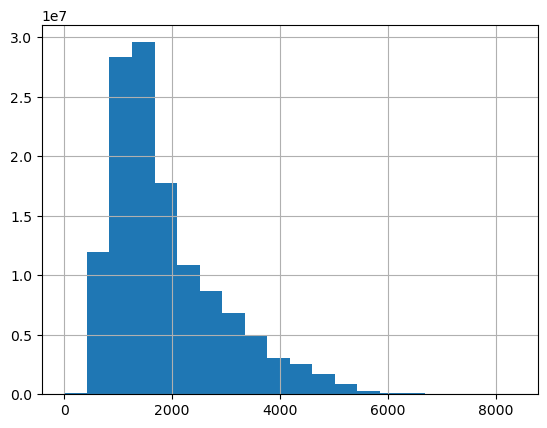

In [14]:
from matplotlib import pyplot as plt
df.transactions.hist(bins=20)
plt.show()

In [15]:

from sklearn.preprocessing import StandardScaler
SS_scaler = StandardScaler()

In [16]:
SS_scaler.fit(df[['transactions']])
df['ss_scaled_transactions']=SS_scaler.transform(df[['transactions']])


<Axes: >

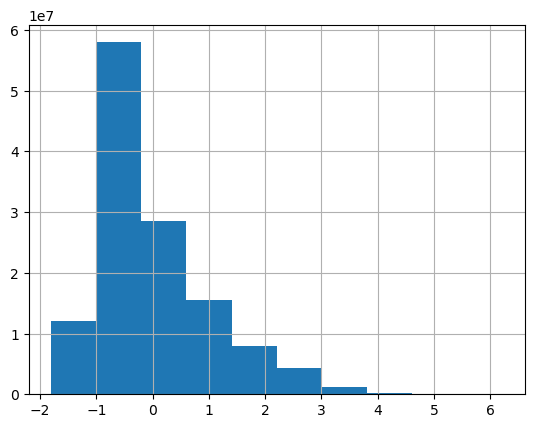

In [17]:
df['ss_scaled_transactions'].hist()

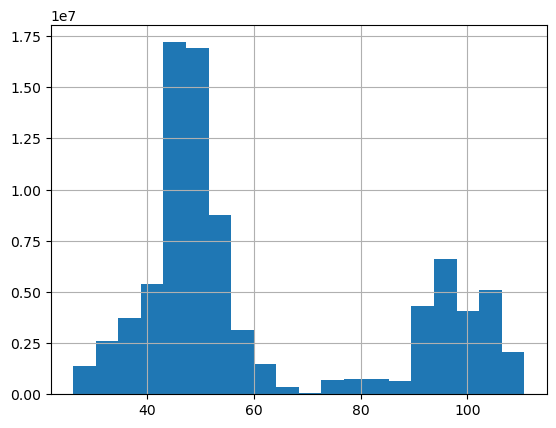

In [18]:
df.dcoilwtico.hist(bins=20)
plt.show()

In [19]:
SS_scaler2 = StandardScaler()
SS_scaler2.fit(df[['dcoilwtico']])
df['ss_scaled_dcoilwtico']=SS_scaler2.transform(df[['dcoilwtico']])


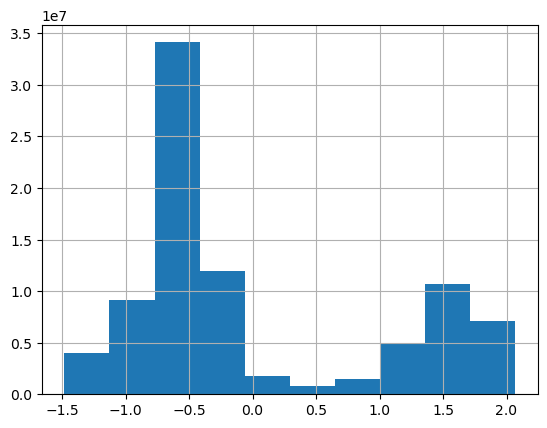

In [20]:
df['ss_scaled_dcoilwtico'].hist()

plt.show()

In [24]:
output_file = 'all_info.csv'
df.to_csv(output_file, index=True)


KeyboardInterrupt



In [124]:
df_new=df



Stored 'df_new' (DataFrame)


In [125]:
df_new.head()

,id,date,unit_sales,dcoilwtico,transactions,city,store_nbr,item_nbr,cluster,perishable,...,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,ss_scaled_transactions,ss_scaled_dcoilwtico
0,21657651,2014-04-01,1.0,99.69,1847,Quito,1,103520,13,0,...,False,False,False,False,False,False,False,False,-0.077457,2.328798
1,21657652,2014-04-01,3.0,99.69,1847,Quito,1,103665,13,1,...,False,False,False,False,False,False,False,False,-0.077457,2.328798
2,21657653,2014-04-01,1.0,99.69,1847,Quito,1,105574,13,0,...,False,False,False,False,False,False,False,False,-0.077457,2.328798
3,21657654,2014-04-01,11.0,99.69,1847,Quito,1,105575,13,0,...,False,False,False,False,False,False,False,False,-0.077457,2.328798
4,21657655,2014-04-01,4.0,99.69,1847,Quito,1,105577,13,0,...,False,False,False,False,False,False,False,False,-0.077457,2.328798


## Explore correlated variables to see which to remove if any

In [142]:
corr_matrix=df_new.corr()

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

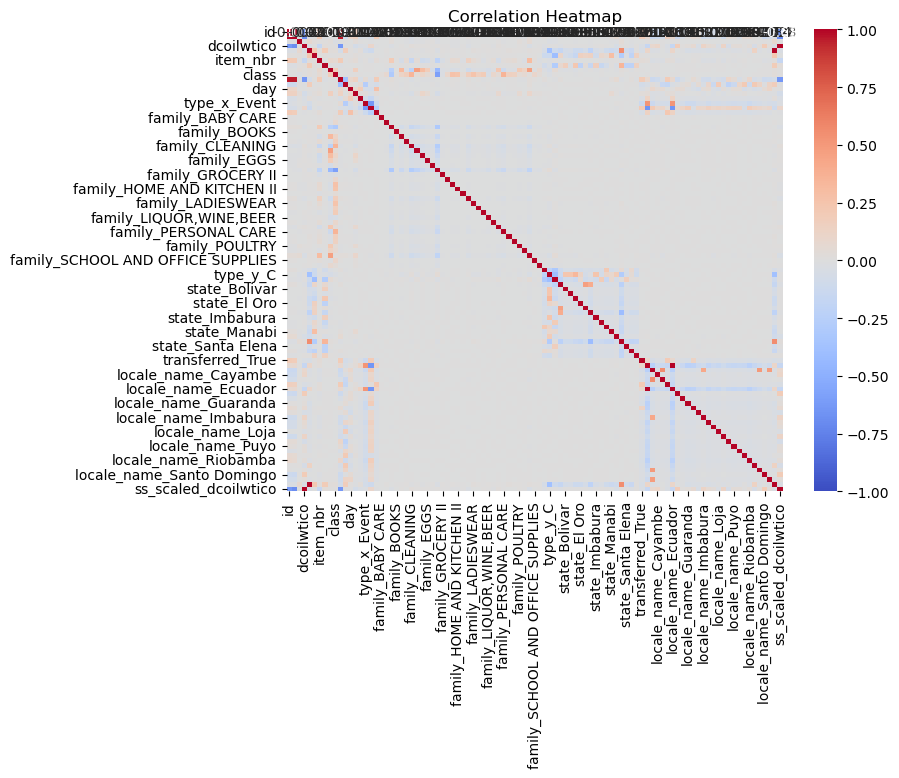

In [144]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
output_file = 'all_info.csv'
items_with_other_info.to_csv(output_file, index=True)